In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\NovaTrade_Brasil_Demand.csv",delimiter = ';')
print(df.head())

   Week of the month (first week, second, third, fourth or fifth week  \
0                                                  1                    
1                                                  1                    
2                                                  1                    
3                                                  2                    
4                                                  2                    

   Day of the week (Monday to Friday)  Non-urgent order  Urgent order  \
0                                   4           316.307       223.270   
1                                   5           128.633        96.042   
2                                   6            43.651        84.375   
3                                   2           171.297       127.667   
4                                   3            90.532       113.526   

   Order type A  Order type B  Order type C  Fiscal sector orders  \
0        61.543       175.586       302.448          

In [10]:
df

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0.000,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0.000,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79.000,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0.000,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865.000,58224,7742,82395,11948,248.428


In [11]:
from sklearn.linear_model import LinearRegression


In [12]:
df.corr()

,"Week of the month (first week, second, third, fourth or fifth week",Day of the week (Monday to Friday),Non-urgent order,Urgent order,Order type A,Order type B,Order type C,Fiscal sector orders,Orders from the traffic controller sector,Banking orders (1),Banking orders (2),Banking orders (3),Target (Total orders)
"Week of the month (first week, second, third, fourth or fifth week",1.000000,-0.207791,0.243472,0.118258,0.256115,0.312767,-0.041582,0.000964,-0.194088,0.392310,0.147086,-0.157059,0.211709
Day of the week (Monday to Friday),-0.207791,1.000000,-0.416331,-0.517106,-0.068894,-0.376512,-0.448823,-0.132397,-0.339485,-0.051815,-0.577035,-0.012251,-0.435286
Non-urgent order,0.243472,-0.416331,1.000000,0.564796,0.561397,0.827186,0.752627,-0.057150,0.246937,0.732357,0.788192,0.132857,0.934518
Urgent order,0.118258,-0.517106,0.564796,1.000000,0.412817,0.508929,0.767155,-0.011452,0.242268,0.230618,0.660868,0.031260,0.729785
Order type A,0.256115,-0.068894,0.561397,0.412817,1.000000,0.438734,0.218651,0.064525,-0.151762,0.675328,0.294374,0.230369,0.559735
Order type B,0.312767,-0.376512,0.827186,0.508929,0.438734,1.000000,0.523598,-0.122432,0.127111,0.592845,0.713674,0.067325,0.900673
Order type C,-0.041582,-0.448823,0.752627,0.767155,0.218651,0.523598,1.000000,0.007906,0.442404,0.330186,0.718739,0.031053,0.804984
Fiscal sector orders,0.000964,-0.132397,-0.057150,-0.011452,0.064525,-0.122432,0.007906,1.000000,0.197670,0.003523,-0.055066,0.294567,-0.052116
Orders from the traffic controller sector,-0.194088,-0.339485,0.246937,0.242268,-0.151762,0.127111,0.442404,0.197670,1.000000,-0.162309,0.240450,0.231614,0.244712
Banking orders (1),0.392310,-0.051815,0.732357,0.230618,0.675328,0.592845,0.330186,0.003523,-0.162309,1.000000,0.262905,0.221335,0.630365


In [76]:
x = df[['Non-urgent order']]



In [77]:
y = df['Target (Total orders)']

In [78]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

In [79]:
model = LinearRegression(fit_intercept=True)

In [80]:
model.fit(xtrain,ytrain)

LinearRegression()

In [81]:
y_pred = model.predict(xtest)

In [82]:
y_pred

array([282.92309343, 450.51578206, 294.16651519, 317.49100135,
       240.65719021, 240.17361496, 297.00261872, 219.59374512,
       354.37816946, 321.062567  , 274.16051968, 254.06184881])

In [83]:
r2 = r2_score(ytest,y_pred)
r2

0.8773931938373436

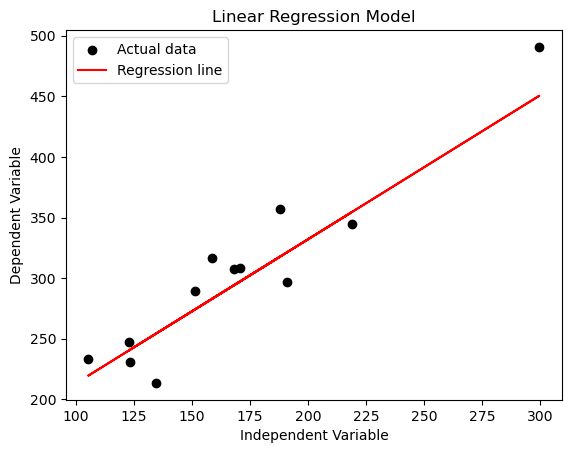

In [84]:
plt.scatter(xtest, ytest, color='black', label='Actual data')
plt.plot(xtest, y_pred, color='red', label='Regression line')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression Model')
plt.legend()
plt.show()


In [85]:
from sklearn.preprocessing import PolynomialFeatures

In [86]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.20)

In [87]:
poly = PolynomialFeatures(degree = 1)

In [88]:
xtrain_poly = poly.fit_transform(xtrain)
xtest_poly = poly.transform(xtest)

In [89]:
polyreg = LinearRegression()
polyreg.fit(xtrain_poly,ytrain)

LinearRegression()

In [90]:
ypredpoly = polyreg.predict(xtest_poly)

In [91]:
r2 = r2_score(ytest, ypredpoly)
r2

0.8738509084955812

In [92]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import MinMaxScaler

In [93]:
x = df.drop(['Target (Total orders)'], axis = 1)
y = df['Target (Total orders)']

In [94]:
mmx = MinMaxScaler()

In [95]:
x_scaled = mmx.fit_transform(x)

In [96]:
xtrain,xtest,ytrain,ytest = train_test_split(x_scaled,y,train_size=0.20)

In [327]:
ridge_regression = Ridge(alpha = 0.01)

In [328]:
ridge_regression.fit(xtrain,ytrain)

Ridge(alpha=0.01)

In [329]:
ridge_regression.coef_

array([ -5.24486009, -10.858226  ,  94.53202847,  75.96741666,
        11.17626016, 135.32756743,  86.10908049,  -4.44023581,
         1.2642608 ,  62.91994779,  49.9747261 ,  24.06013514])

In [330]:
yypred = ridge_regression.predict(xtest)

In [331]:
r2_score(ytest,yypred)

0.9714144100297591

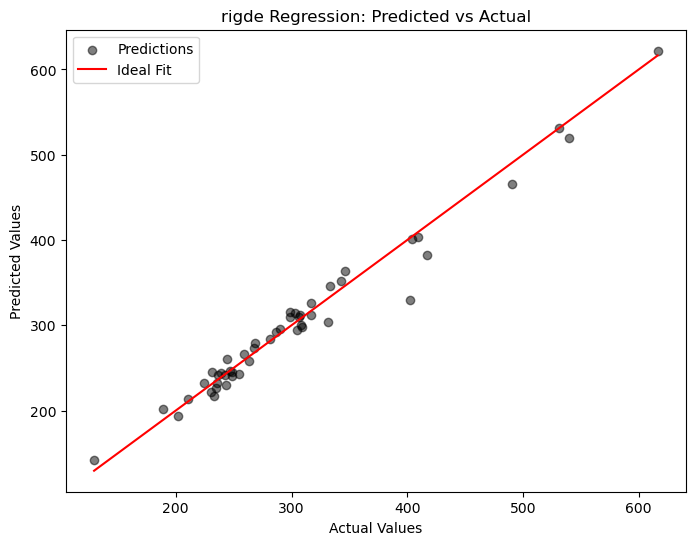

In [332]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, yypred, alpha=0.5, color='black', label="Predictions")
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("rigde Regression: Predicted vs Actual")
plt.legend()
plt.show()

In [333]:
lass = Lasso(alpha=0.01, max_iter=5000)

In [334]:
lass.fit(xtrain,ytrain)

Lasso(alpha=0.01, max_iter=5000)

In [335]:
yypred = lass.predict(xtest)

In [336]:
r2_score(ytest,yypred)

0.9999704798874962

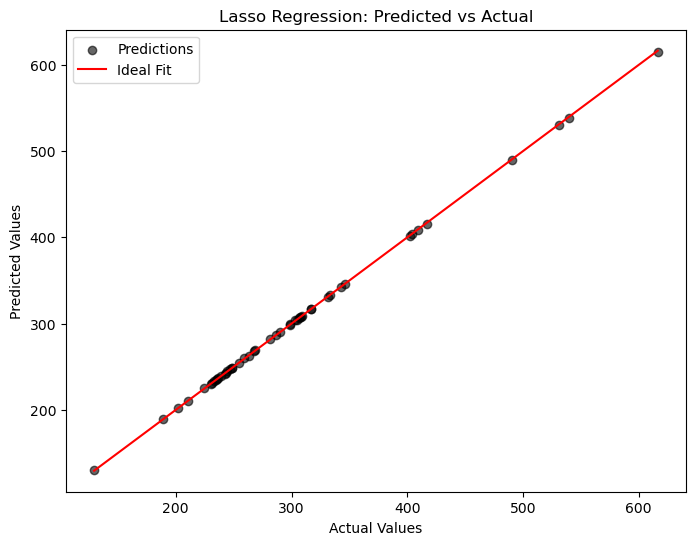

In [337]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, yypred, alpha=0.6, color='black', label="Predictions")
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Lasso Regression: Predicted vs Actual")
plt.legend()
plt.show()


In [338]:
en_regression = ElasticNet(alpha = 0.05,l1_ratio = 0.5)

In [339]:
en_regression.fit(xtrain,ytrain)

ElasticNet(alpha=0.05)

In [340]:
en_regression.coef_

array([ -0.71017896, -35.35563955,  47.51532391,  53.26283402,
        20.27589931,  72.77719278,  44.67890209, -32.06709088,
        -5.73181   ,  42.254274  ,  60.44401667,  12.36923002])

In [341]:
ypred_en = lass.predict(xtest)

In [342]:
r2_score(ytest,yypred)

0.9999704798874962

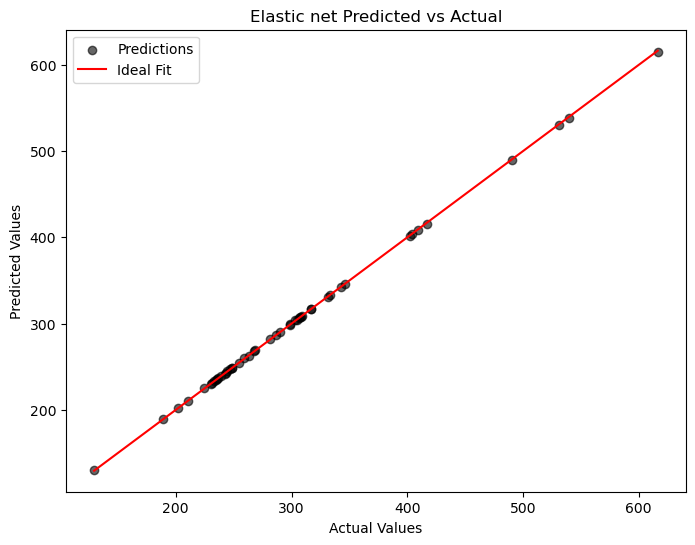

In [343]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred_en, alpha=0.6, color='black', label="Predictions")
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', label="Ideal Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Elastic net Predicted vs Actual")
plt.legend()
plt.show()

In [344]:
ridge = Ridge(alpha=10)
lasso = Lasso(alpha=0.01)
elastic_net = ElasticNet(alpha=0.05, l1_ratio=0.5)


In [345]:
voting_reg = VotingRegressor(estimators=[
    ('ridge', ridge),
    ('lasso', lasso),
    ('elastic_net', elastic_net)
])


In [346]:
voting_reg.fit(xtrain, ytrain)


VotingRegressor(estimators=[('ridge', Ridge(alpha=10)),
                            ('lasso', Lasso(alpha=0.01)),
                            ('elastic_net', ElasticNet(alpha=0.05))])

In [347]:
y_pred = voting_reg.predict(xtest)
r2 = r2_score(ytest, ypred)
print(f"R² Score: {r2:.4f}")


R² Score: 1.0000


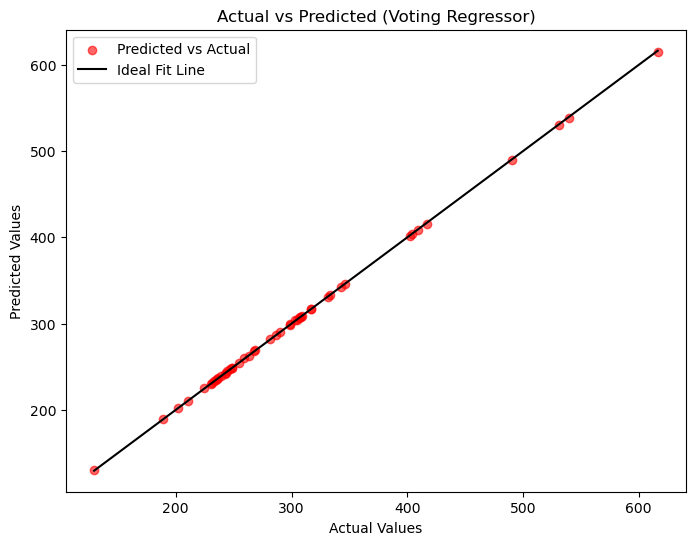

In [348]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, ypred, color='red', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='black', label='Ideal Fit Line')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Voting Regressor)")
plt.legend()
plt.show()


In [349]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

In [280]:
scaler_X = StandardScaler()
scaler_Y= StandardScaler()

In [133]:
x_train_scaled = scaler_X.fit_transform(xtrain)
x_test_scaled = scaler_X.fit_transform(xtest)
y_train_scaled = scaler_Y.fit_transform(ytrain.values.reshape(-1,1)).ravel()

In [134]:
svr = SVR(kernel='linear', C=100, epsilon=0.1, gamma='scale')
svr.fit(x_train_scaled, y_train_scaled)

# Predict on Test Data
y_pred_scaled = svr.predict(x_test_scaled)
y_pred = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()


In [135]:
r2 = r2_score(ytest, y_pred)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))


In [159]:
print(f"R² Score: {r2:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R² Score: 0.701
Root Mean Squared Error (RMSE): 51.25


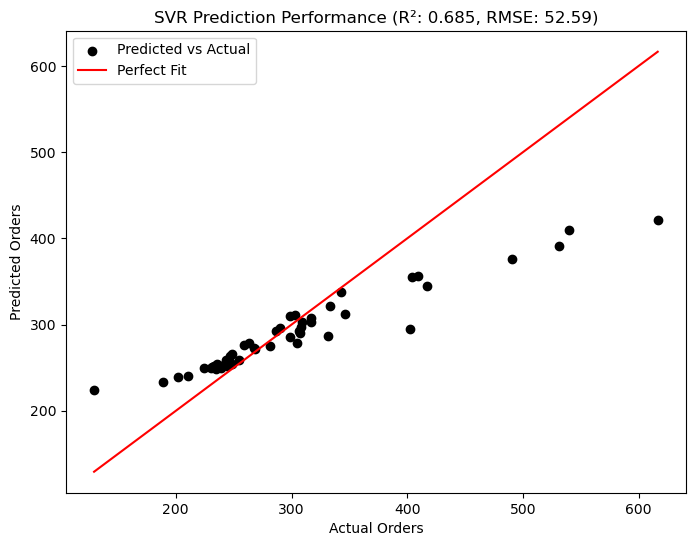

In [221]:
plt.figure(figsize=(8,6))
plt.scatter(ytest, y_pred, color='black', label="Predicted vs Actual")
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color="red", label="Perfect Fit")
plt.xlabel("Actual Orders")
plt.ylabel("Predicted Orders")
plt.legend()
plt.title(f"SVR Prediction Performance (R²: {r2:.3f}, RMSE: {rmse:.2f})")
plt.show()



In [165]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(xtrain, ytrain)
y_pred_rf = rf.predict(xtest)
print("R² Score (Random Forest):", r2_score(ytest, y_pred_rf))


R² Score (Random Forest): 0.544339567180579


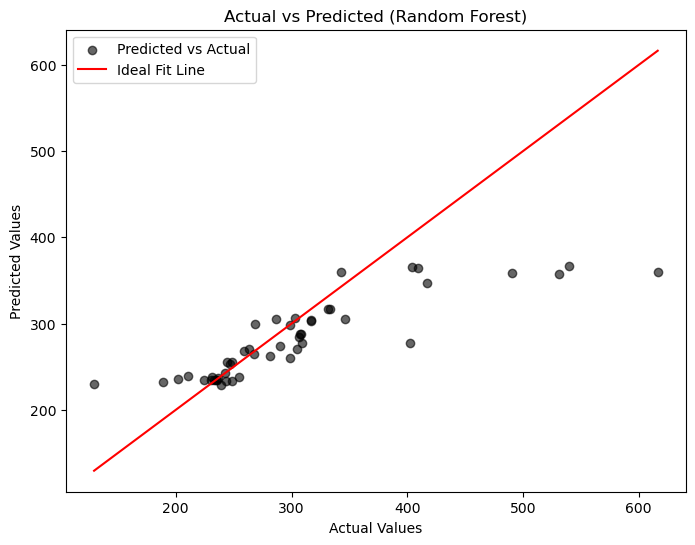

In [216]:
plt.figure(figsize=(8, 6))
plt.scatter(ytest, y_pred_rf, color='black', alpha=0.6, label='Predicted vs Actual')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='red', label='Ideal Fit Line')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Random Forest)")
plt.legend()
plt.show()



In [172]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.9, random_state=42)
gbr.fit(xtrain, ytrain)
y_pred_gbr = gbr.predict(xtest)
print("R² Score (Gradient Boosting):", r2_score(ytest, y_pred_gbr))


R² Score (Gradient Boosting): 0.642742701664781


In [173]:
from sklearn.neighbors import KNeighborsRegressor

In [174]:
knn = KNeighborsRegressor(n_neighbors=3,weights='uniform',metric='manhattan')
knn.fit(x_train_scaled,y_train_scaled)

KNeighborsRegressor(metric='manhattan', n_neighbors=3)

In [175]:
y_pred =  knn.predict(x_test_scaled)

In [176]:
y_pred_scaled = knn.predict(x_test_scaled)
y_pred = scaler_Y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()
test_r2 = r2_score(ytest, y_pred)
print(f"✅ R² Score on Test Set: {test_r2}")




✅ R² Score on Test Set: 0.49858670533078886


In [146]:
from sklearn.ensemble import VotingRegressor

In [364]:
lr = LinearRegression()
svr = SVR(kernel='linear')
knn = KNeighborsRegressor(n_neighbors=3,weights='uniform',metric='manhattan')
elastic =ElasticNet(alpha=0.01, l1_ratio=0.6)
lass = Lasso(alpha=0.01)
ridge_regression = Ridge(alpha=0.01)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.9, random_state=42)
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [365]:
voting_regression = VotingRegressor(estimators=[
    ('model', model),
    ('poly',polyreg),
    ('ridge', ridge),
    ('lass', lass),
    ('svr', svr),
    ('knn', knn),
    ('gbr',gbr),
    ('rf',rf)
])

In [366]:
voting_regression.fit(x_train_scaled,ytrain)

VotingRegressor(estimators=[('model', LinearRegression()),
                            ('poly', LinearRegression()),
                            ('ridge', Ridge(alpha=10)),
                            ('lass', Lasso(alpha=0.01)),
                            ('svr', SVR(kernel='linear')),
                            ('knn',
                             KNeighborsRegressor(metric='manhattan',
                                                 n_neighbors=3)),
                            ('gbr',
                             GradientBoostingRegressor(learning_rate=0.9,
                                                       random_state=42)),
                            ('rf', RandomForestRegressor(random_state=42))])

In [367]:
y_pred = voting_regression.predict(x_test_scaled)

In [368]:
import warnings
warnings.filterwarnings("ignore")


In [369]:
r2 = r2_score(ytest, y_pred)
mae = mean_absolute_error(ytest, y_pred)
rmse = mean_squared_error(ytest, y_pred, squared=False)
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R² Score: 0.78
Mean Absolute Error: 27.39
Root Mean Squared Error: 43.94


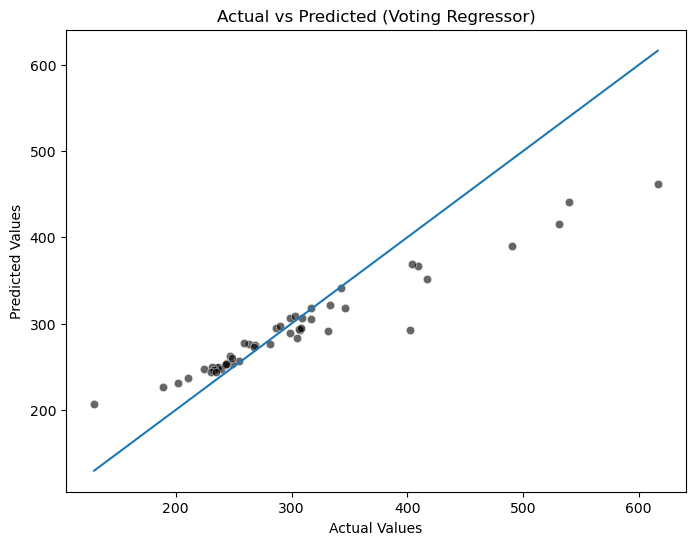

In [370]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=ytest, y=y_pred, color="black", alpha=0.6)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()])  
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted (Voting Regressor)")
plt.show()
